In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/traffic-violations-in-maryland-county/Traffic_Violations.csv


In [576]:
import warnings
warnings.filterwarnings('ignore')

data = '/kaggle/input/traffic-violations-in-maryland-county/Traffic_Violations.csv'
df = pd.read_csv(data)

In [577]:
df.shape

(1292399, 35)

In [578]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
Date Of Stop               1292399 non-null object
Time Of Stop               1292399 non-null object
Agency                     1292399 non-null object
SubAgency                  1292389 non-null object
Description                1292390 non-null object
Location                   1292397 non-null object
Latitude                   1197045 non-null float64
Longitude                  1197045 non-null float64
Accident                   1292399 non-null object
Belts                      1292399 non-null object
Personal Injury            1292399 non-null object
Property Damage            1292399 non-null object
Fatal                      1292399 non-null object
Commercial License         1292399 non-null object
HAZMAT                     1292399 non-null object
Commercial Vehicle         1292399 non-null object
Alcohol                    1292399 non-null object
Work Zone         

In [580]:
df['Violation Type'].unique()

array(['Citation', 'Warning', 'ESERO', 'SERO'], dtype=object)

In [581]:
# ESERO: Electronic Safety Equipment Repair Order
# SERO: Safety Equipment Repair Order

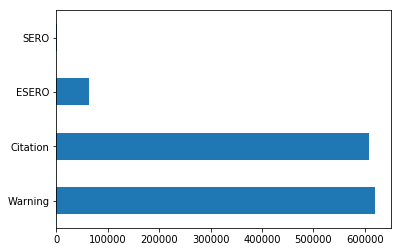

In [582]:
df['Violation Type'].value_counts()[:4].plot(kind='barh')

In [583]:
violation_type = df['Violation Type']
violation_table = pd.get_dummies(violation_type)

violation_table

,Citation,ESERO,SERO,Warning
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1292394,0,1,0,0
1292395,0,1,0,0
1292396,0,1,0,0
1292397,0,1,0,0


In [584]:
df['Violation Type'].value_counts()

Warning     620103
Citation    607150
ESERO        64224
SERO           922
Name: Violation Type, dtype: int64

In [585]:
print("rate of Warning: ", 620103/1292399)
print("rate of Citation: ", 607150/1292399)
print("rate of ESERO: ", 64224/1292399)
print("rate of SERO: ", 922/1292399)

rate of Warning:  0.4798077064435983
rate of Citation:  0.46978525981527375
rate of ESERO:  0.04969363176542229
rate of SERO:  0.0007134019757056451


In [586]:
col_vio = df.drop(columns = ['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Violation Type',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'Commercial Vehicle', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident',
       'Driver State', 'DL State',
       'Geolocation'])

col_vio

,Accident,Belts,HAZMAT,Alcohol,Race,Gender,Driver City,Arrest Type
0,No,No,No,No,BLACK,M,TAKOMA PARK,A - Marked Patrol
1,No,No,No,No,WHITE,F,FAIRFAX STATION,A - Marked Patrol
2,No,No,No,No,BLACK,F,UPPER MARLBORO,A - Marked Patrol
3,No,No,No,No,BLACK,M,FORT WASHINGTON,A - Marked Patrol
4,No,No,No,No,WHITE,M,GAITHERSBURG,A - Marked Patrol
...,...,...,...,...,...,...,...,...
1292394,No,No,No,No,BLACK,F,MONTGOMERY VILLAGE,A - Marked Patrol
1292395,No,No,No,No,HISPANIC,M,GAITHERSBURG,A - Marked Patrol
1292396,No,No,No,No,WHITE,F,GERMANTOWN,A - Marked Patrol
1292397,No,No,No,No,BLACK,F,SILVER SPRING,A - Marked Patrol


In [587]:
col_vio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 8 columns):
Accident       1292399 non-null object
Belts          1292399 non-null object
HAZMAT         1292399 non-null object
Alcohol        1292399 non-null object
Race           1292399 non-null object
Gender         1292399 non-null object
Driver City    1292182 non-null object
Arrest Type    1292399 non-null object
dtypes: object(8)
memory usage: 78.9+ MB


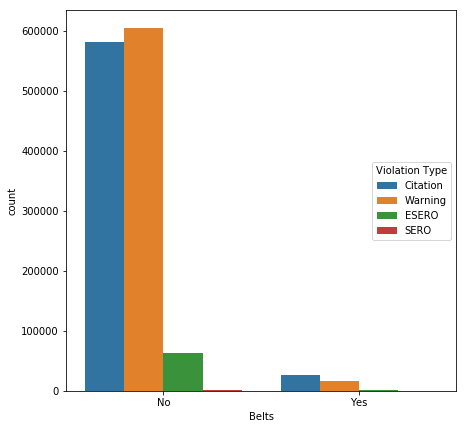

In [588]:
plt.figure(figsize=(7,7))
sns.countplot(x='Belts', hue='Violation Type', data = df)
plt.legend(loc='center right', title='Violation Type')

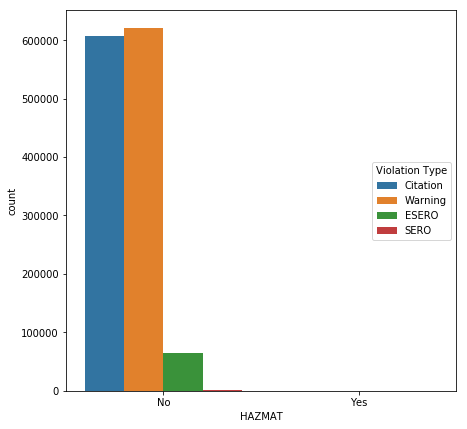

In [589]:
plt.figure(figsize=(7,7))
sns.countplot(x='HAZMAT', hue='Violation Type', data = df)
plt.legend(loc='center right', title='Violation Type')

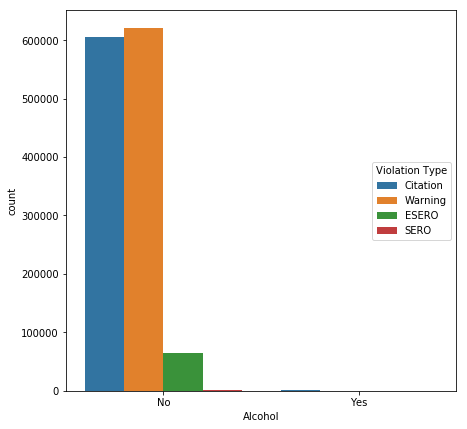

In [590]:
plt.figure(figsize=(7,7))
sns.countplot(x='Alcohol', hue='Violation Type', data = df)
plt.legend(loc='center right', title='Violation Type')

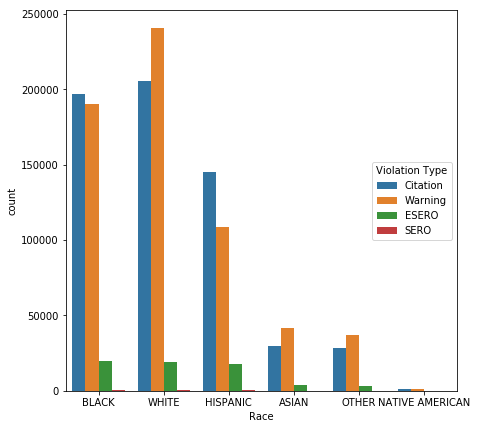

In [591]:
plt.figure(figsize=(7,7))
sns.countplot(x='Race', hue='Violation Type', data = df)
plt.legend(loc='center right', title='Violation Type')

In [592]:
for col in col_vio:
    print(df[col].value_counts())

No    1292399
Name: Accident, dtype: int64
No     1247956
Yes      44443
Name: Belts, dtype: int64
No     1292272
Yes        127
Name: HAZMAT, dtype: int64
No     1290191
Yes       2208
Name: Alcohol, dtype: int64
WHITE              465808
BLACK              407493
HISPANIC           271966
ASIAN               75454
OTHER               68738
NATIVE AMERICAN      2940
Name: Race, dtype: int64
M    865862
F    425097
U      1440
Name: Gender, dtype: int64
SILVER SPRING    322949
GAITHERSBURG     132171
GERMANTOWN       105725
ROCKVILLE        105359
WASHINGTON        39612
                  ...  
CANDIAC               1
ALBURTIS              1
COCKEYESVILLE         1
SANTA CLARITA         1
WINTER SPGS           1
Name: Driver City, Length: 7293, dtype: int64
A - Marked Patrol                         1062884
Q - Marked Laser                           123743
B - Unmarked Patrol                         41345
S - License Plate Recognition               13412
O - Foot Patrol                 

In [593]:
# check missing values in variables

df.isnull().sum()

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    9
Location                       2
Latitude                   95354
Longitude                  95354
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        8074
Make                          57
Model                        187
Color                      16127
Violation Type                 0
Charge                         0
Article                    65169
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

In [594]:
df2 = df.drop(columns = ['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'Commercial Vehicle', 'Work Zone', 'State','Accident',
       'VehicleType', 'Year', 'Make', 'Color',
       'Charge', 'Article', 'Contributed To Accident',
       'Driver State', 'DL State',
       'Geolocation'])

In [595]:
list(df2)

['Belts',
 'HAZMAT',
 'Alcohol',
 'Model',
 'Violation Type',
 'Race',
 'Gender',
 'Driver City',
 'Arrest Type']

In [596]:
# define feature vector and target variable

X = df2.drop(['Violation Type'], axis=1)

y = df2['Violation Type']

In [597]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [598]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((865907, 8), (426492, 8))

In [599]:
# check data types in X_train

X_train.dtypes

Belts          object
HAZMAT         object
Alcohol        object
Model          object
Race           object
Gender         object
Driver City    object
Arrest Type    object
dtype: object

In [600]:
X_train.head()

,Belts,HAZMAT,Alcohol,Model,Race,Gender,Driver City,Arrest Type
4402,No,No,No,4S,ASIAN,M,GAITHERSBURG,G - Marked Moving Radar (Stationary)
1179302,No,No,No,ESCALADE,WHITE,M,POTOMAC,Q - Marked Laser
1109638,No,No,No,ESCAPE,WHITE,F,GAITHERSBURG,A - Marked Patrol
159794,No,No,No,PASSAT,HISPANIC,M,SILVER SPRING,A - Marked Patrol
161084,No,No,No,ASCENDER,BLACK,M,ROCKVILLE,A - Marked Patrol


In [601]:
# Encode categorical variables

import category_encoders as ce

In [602]:
encoder = ce.OrdinalEncoder(cols=['Belts', 'HAZMAT', 'Alcohol', 'Model', 'Race', 'Gender','Driver City','Arrest Type'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [603]:
X_test.head()

,Belts,HAZMAT,Alcohol,Model,Race,Gender,Driver City,Arrest Type
1198540,1,1,1,1.0,4,2,3.0,3
1112629,1,1,1,327.0,4,1,63.0,3
838170,1,1,1,2167.0,2,2,7.0,3
1155368,1,1,1,16.0,2,2,5.0,3
223755,1,1,1,181.0,4,2,5.0,3


In [604]:
X_train.head()

,Belts,HAZMAT,Alcohol,Model,Race,Gender,Driver City,Arrest Type
4402,1,1,1,1,1,1,1,1
1179302,1,1,1,2,2,1,2,2
1109638,1,1,1,3,2,2,1,3
159794,1,1,1,4,3,1,3,3
161084,1,1,1,5,4,1,4,3


# Decision Tree Classifier with criterion gini index

In [605]:
from sklearn.tree import DecisionTreeClassifier

In [606]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [607]:
# Predict the Test set results with criterion gini index

y_pred_gini = clf_gini.predict(X_test)

In [608]:
# Check accuracy score with criterion gini index

from sklearn.metrics import accuracy_score

print('accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

accuracy score with criterion gini index: 0.5298


In [609]:
# Compare the train-set and test-set accuracy

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Citation', 'Citation', 'Warning', ..., 'Warning', 'Warning',
       'Citation'], dtype=object)

In [610]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5287


In [611]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5287
Test set score: 0.5298


[Text(446.4, 475.65000000000003, 'X[5] <= 1.5\ngini = 0.547\nsamples = 865907\nvalue = [406459, 43103, 620, 415725]'),
 Text(223.2, 339.75, 'X[4] <= 2.5\ngini = 0.547\nsamples = 579834\nvalue = [286551, 29828, 457, 262998]'),
 Text(111.6, 203.85000000000002, 'X[7] <= 2.5\ngini = 0.542\nsamples = 226971\nvalue = [103284, 10356, 164, 113167]'),
 Text(55.8, 67.94999999999999, 'gini = 0.501\nsamples = 27889\nvalue = [15581, 258, 8, 12042]'),
 Text(167.39999999999998, 67.94999999999999, 'gini = 0.545\nsamples = 199082\nvalue = [87703, 10098, 156, 101125]'),
 Text(334.79999999999995, 203.85000000000002, 'X[4] <= 3.5\ngini = 0.547\nsamples = 352863\nvalue = [183267, 19472, 293, 149831]'),
 Text(279.0, 67.94999999999999, 'gini = 0.544\nsamples = 140565\nvalue = [78433, 9283, 160, 52689]'),
 Text(390.59999999999997, 67.94999999999999, 'gini = 0.544\nsamples = 212298\nvalue = [104834, 10189, 133, 97142]'),
 Text(669.5999999999999, 339.75, 'X[7] <= 2.5\ngini = 0.537\nsamples = 286073\nvalue = [11

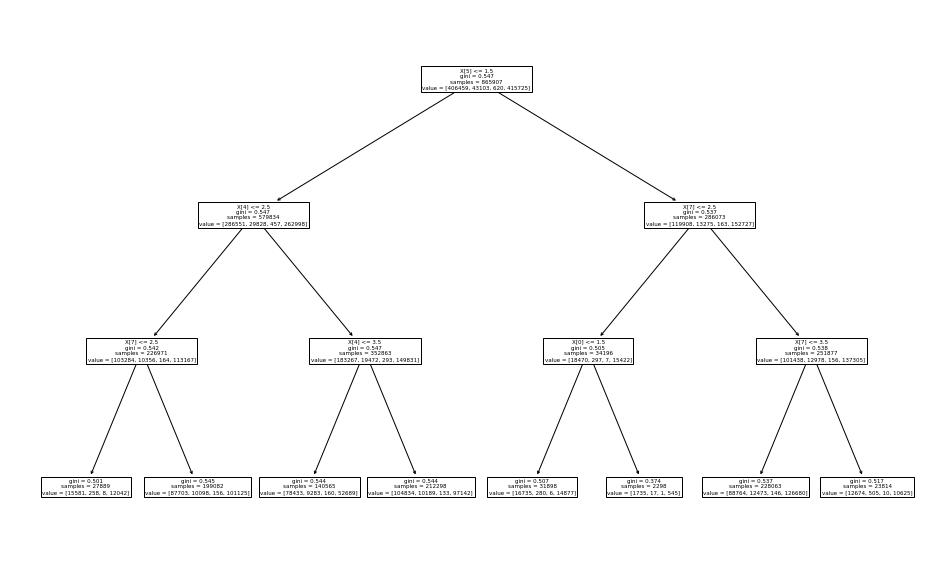

In [612]:
# visualize decision-tree

plt.figure(figsize=(16,10))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

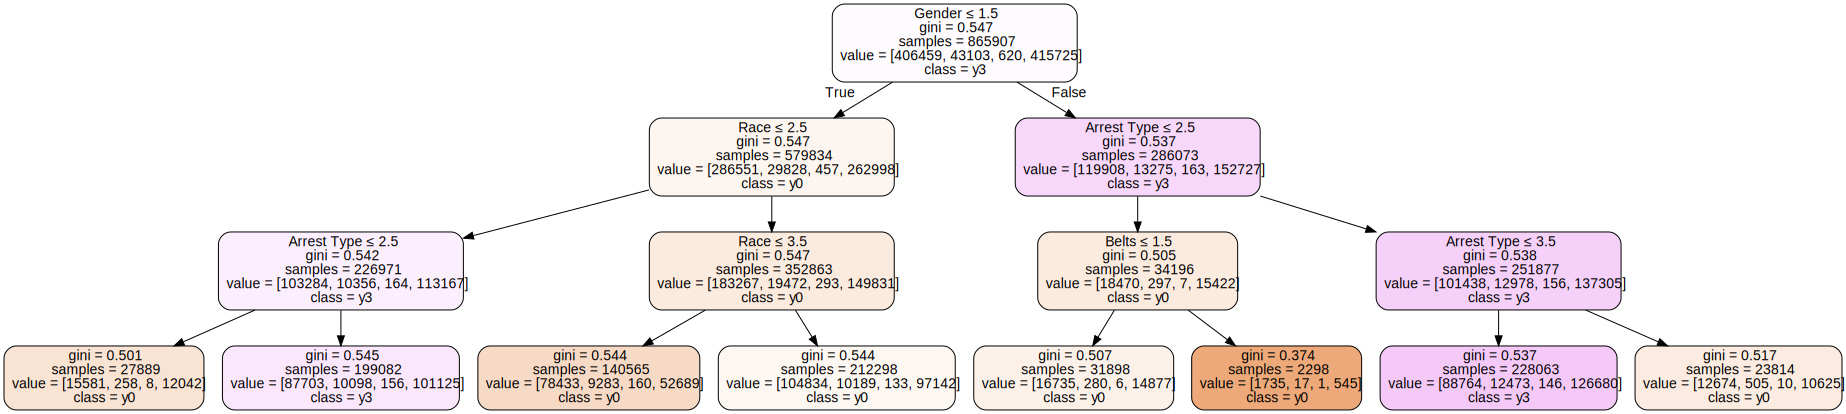

In [613]:
# Visualize decision-trees with graphviz

import graphviz 

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=['Belts', 'HAZMAT', 'Alcohol', 'Model', 'Race', 'Gender','Driver City','Arrest Type'],  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

# Decision Tree Classifier with criterion entropy

In [614]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[Text(446.4, 475.65000000000003, 'X[7] <= 2.5\nentropy = 1.243\nsamples = 865907\nvalue = [406459, 43103, 620, 415725]'),
 Text(223.2, 339.75, 'X[0] <= 1.5\nentropy = 1.068\nsamples = 86829\nvalue = [49097, 999, 26, 36707]'),
 Text(111.6, 203.85000000000002, 'X[4] <= 2.5\nentropy = 1.074\nsamples = 81367\nvalue = [44985, 955, 24, 35403]'),
 Text(55.8, 67.94999999999999, 'entropy = 1.06\nsamples = 44438\nvalue = [23507, 365, 9, 20557]'),
 Text(167.39999999999998, 67.94999999999999, 'entropy = 1.083\nsamples = 36929\nvalue = [21478, 590, 15, 14846]'),
 Text(334.79999999999995, 203.85000000000002, 'X[3] <= 6.5\nentropy = 0.862\nsamples = 5462\nvalue = [4112, 44, 2, 1304]'),
 Text(279.0, 67.94999999999999, 'entropy = 0.422\nsamples = 1746\nvalue = [1609, 8, 0, 129]'),
 Text(390.59999999999997, 67.94999999999999, 'entropy = 0.98\nsamples = 3716\nvalue = [2503, 36, 2, 1175]'),
 Text(669.5999999999999, 339.75, 'X[5] <= 1.5\nentropy = 1.257\nsamples = 779078\nvalue = [357362, 42104, 594, 37901

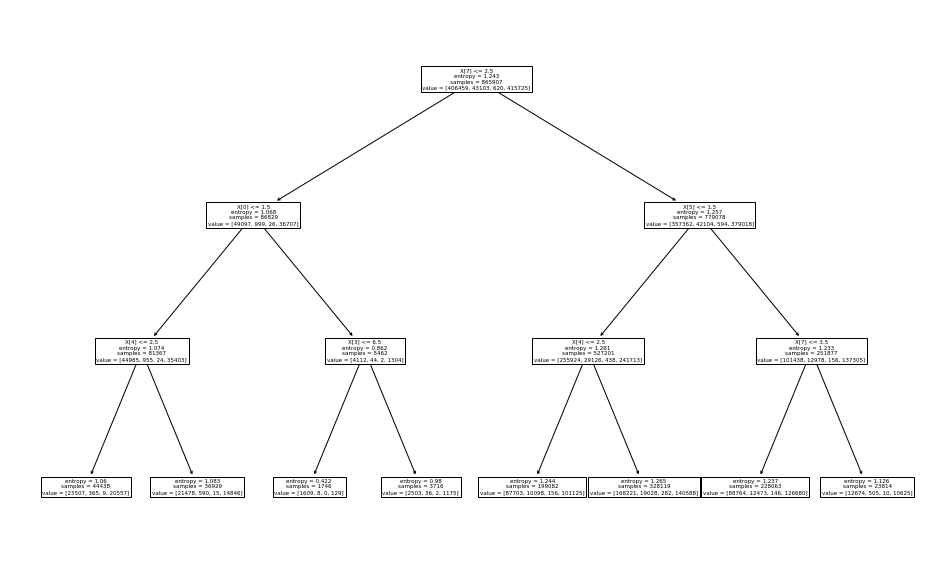

In [615]:
plt.figure(figsize=(16,10))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

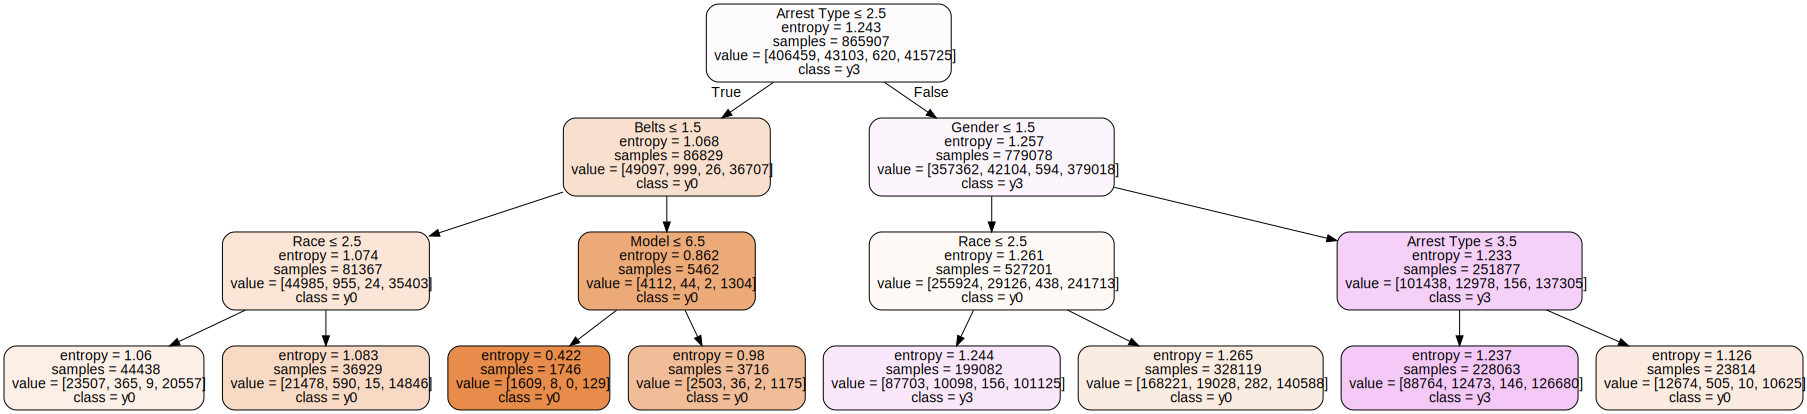

In [616]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=['Belts', 'HAZMAT', 'Alcohol', 'Model', 'Race', 'Gender','Driver City','Arrest Type'],  
                              class_names=True,   
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

# classification report

In [617]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

    Citation       0.53      0.57      0.55    200691
       ESERO       0.00      0.00      0.00     21121
        SERO       0.00      0.00      0.00       302
     Warning       0.53      0.55      0.54    204378

    accuracy                           0.53    426492
   macro avg       0.26      0.28      0.27    426492
weighted avg       0.50      0.53      0.52    426492

